## Lyft Challenge

__Your task is to write an algorithm to take an image like the one on the left and<br> 
generate a labeled image like the one on the right. Except you will be generating<br>
a binary labeled image for vehicles and a binary labeled image for the drivable<br>
surface of the road.__

In [1]:
import matplotlib.pyplot as plt
import glob
import numpy as np
from PIL import Image

%matplotlib inline

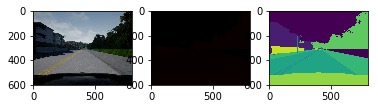

In [3]:
# Load one RGB and the corresponding Seg Image
img_rgb0 = Image.open('Train/CameraRGB/0.png', 'r')
img_seg0 = Image.open('Train/CameraSeg/0.png', 'r')

fig, ax = plt.subplots(1,3)

ax[0].imshow(np.asarray(img_rgb0))
ax[1].imshow(np.asarray(img_seg0))
ax[2].imshow(np.asarray(img_seg0)[:,:,0])

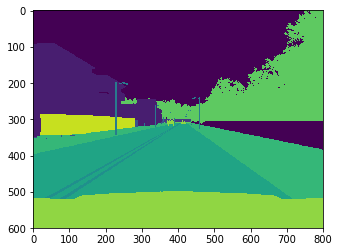

In [4]:
# Convert classes in R channel into different colors
# For this competition we're only interested in road and vehicles classes
gt_img_seg0 = np.asarray(img_seg0)
plt.imshow(gt_img_seg0[:,:,0])

In [32]:
None_ = 0
Buildings = 1
Fences = 2
Other = 3
Pedestrians = 4 
Poles = 5
RoadLines = 6
Roads = 7
Sidewalks = 8
Vegetation = 9
Vehicles = 10
Walls = 11
TrafficSigns = 12

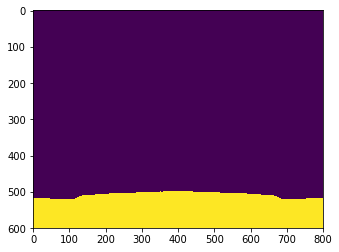

In [66]:
# Create a mask to remove the self car
w, h = img_seg0.size
self_car = img_seg0.crop((0, 490, w, h))
self_car__ = np.asarray(self_car)[:,:,0].copy()
self_car__[self_car__ != Vehicles] = None_

b = np.zeros((490, w))
mask = np.vstack((b, self_car__))

plt.imshow(mask)

In [9]:
# Your task is to write an algorithm to take an image like the one on the left and 
# generate a labeled image like the one on the right. Except you will be generating 
# a binary labeled image for vehicles and a binary labeled image for the drivable 
# surface of the road.

In [74]:
# Create a ground truth image for Vehicles (10) and for the drivabel surface of the road, Roads (6) and RoadLines (7)
def create_new_gt(img):
    gt = img[:,:,0].copy()

    # Keep Vehicles, Roads and RoadLines and set all other to 0
    gt[(gt != Vehicles) & (gt0 != Roads) & (gt0 != RoadLines)] = None_

    # Treat RoadLines and Roads
    gt_ = gt.copy()
    gt_[gt_ == RoadLines] = Roads
    gt__ = gt_.copy()
    gt__[gt__ == mask] = None_

    return gt, gt_, gt__

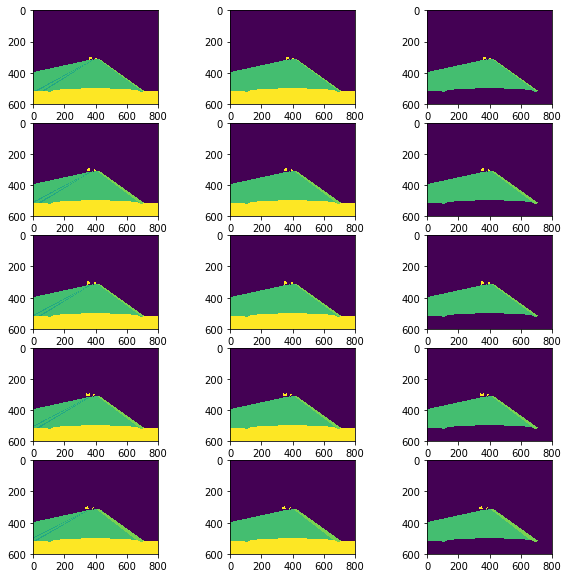

In [93]:
# Now lets try to generate the ground truth for 5 images
img_seg1 = Image.open('Train/CameraSeg/1.png', 'r')
gt1, gt1_, gt1__ = create_new_gt(np.asarray(img_seg1))

img_seg2 = Image.open('Train/CameraSeg/2.png', 'r')
gt2, gt2_, gt2__ = create_new_gt(np.asarray(img_seg2))

img_seg3 = Image.open('Train/CameraSeg/3.png', 'r')
gt3, gt3_, gt3__ = create_new_gt(np.asarray(img_seg3))

img_seg4 = Image.open('Train/CameraSeg/4.png', 'r')
gt4, gt4_, gt4__ = create_new_gt(np.asarray(img_seg4))

img_seg5 = Image.open('Train/CameraSeg/5.png', 'r')
gt5, gt5_, gt5__ = create_new_gt(np.asarray(img_seg5))

fig, ax = plt.subplots(5,3)
fig.set_size_inches(10, 10)
ax[0][0].imshow(gt1);ax[0][1].imshow(gt1_);ax[0][2].imshow(gt1__)
ax[1][0].imshow(gt2);ax[1][1].imshow(gt2_);ax[1][2].imshow(gt2__)
ax[2][0].imshow(gt3);ax[2][1].imshow(gt3_);ax[2][2].imshow(gt3__)
ax[3][0].imshow(gt4);ax[3][1].imshow(gt4_);ax[3][2].imshow(gt4__)
ax[4][0].imshow(gt5);ax[4][1].imshow(gt5_);ax[4][2].imshow(gt5__)

In [99]:
seg_files = glob.glob('Train/CameraSeg/*.png')
new_ground_truths = [create_new_gt(np.asarray(Image.open(file))) for file in seg_files]

In [101]:
output_folder = 'Train/GroundTruthVehicleAndRoad'
counter = 0
for gt, gt_, gt__ in new_ground_truths:
    path = output_folder + "/" + str(counter) + ".png"
im = Image.fromarray(A)
im.save("your_file.jpeg")
    counter += 1
    

TypeError: write() argument must be str, not numpy.ndarray